# Term0 Week2 授業課題 
## コーディング課題：富士下山

## 1. 断面図の作成
csvファイルは、左から順番に「その地点の番号(x)」「緯度」「経度」「標高(elevation)」「地点0からの距離」となっている。標高と距離の単位はメートル。
- 断面図をMatplotlibを使い作成。
- x=136の地点の赤い点や矢印も表示させてください。

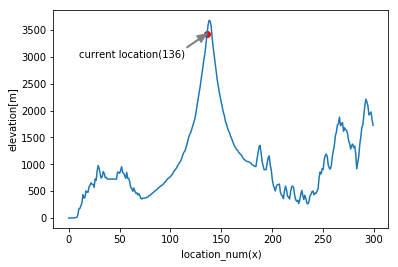

------データセットの中身------
 [[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)

point = {
        'start': [10, 3000],
        'end': [136, fuji[136,3]]
    }

plt.plot(*point['end'], 'o', color="red")
plt.annotate('current location(136)', xy=point['end'], xytext=point['start'],
             arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, 
                             connectionstyle='arc3', facecolor='gray', 
                             edgecolor='gray'))
plt.plot(fuji[:,0],fuji[:,3])
plt.xlabel("location_num(x)")
plt.ylabel("elevation[m]")
plt.show()
print("------データセットの中身------\n", fuji)

## 2. 勾配の計算の関数
- 「今いる地点x」と「その隣の地点x-1」の関係による勾配を求める関数を作成。
- この関数が返す値を「今いる地点の勾配」として次の問題で作成する関数内で使う。

勾配は授業前課題で行ったように、以下の計算で求まる。  
（yの変化量）/（xの変化量）  
このデータでは「標高（elevation)」が$y$に相当する。$x$はそのまま「その地点の番号($x$)」。

In [2]:
def gradient_calc(x):
    return fuji[x,3]-fuji[x-1,3] # xの変化量は常に1なので計算式における表現は省略

## 3. 勾配降下法の関数を作成
勾配降下法の関数を作成する。
数式で表すと 「移動すべき地点 = 今いる地点 - $\alpha$ ×今いる地点の勾配」 となる。
- 関数を使い、今いる$x$が136の地点（標高3434.59[m]）から、山を下っていく。
- 移動毎の標高はリストに記録し、その過程を可視化。
- 断面図を目視したり、読み込んだ数値を確認して分かることと比べてどうなっているでしょうか。

**実装上の注意**  
- 計算結果の勾配は、四捨五入により整数値に変換する必要がある。
- 断面図の中に点を表示したり、繰り返し毎の標高や勾配を折れ線グラフで見てみることができる。

**$\alpha$の補足**  
$\alpha$は0より大きい任意の値をとるハイパーパラメータ（学習率）。複数試し、うまく下りられる$\alpha$の値を見つける。

**初期値の補足**  
最初に居た$x=136$の地点のことを初期値と呼ぶ。

------勾配の配列(300要素)------
 [   0.      0.      0.      0.      0.      0.      6.62    0.59    4.99
   42.21  117.15    6.28   50.37   47.17  158.38  -62.02    8.32  123.34
  -18.01   -7.57  102.68   30.42   44.04  -26.74   -1.58  -54.09  151.4
  -22.01  177.53   96.7   -57.01 -102.16  -73.94   27.86   93.14  -37.54
  -78.13    7.72  -31.61    0.      0.      0.      0.      0.      0.
    0.      0.      0.    127.68   -0.82  -20.36   49.44   74.7  -105.62
  -17.92  -41.59  -51.04  109.86 -110.53   -1.82  -64.24 -108.22  -11.79
  -54.82   60.87  -55.26  -40.69    7.33  -40.17   24.72  -41.94  -49.98
   -6.61   13.23    2.13    0.15    6.43    9.02    3.5    28.27    2.19
   22.4    15.66   13.16   16.58   16.7    14.44   17.     17.1    21.43
   13.92   13.37   10.68   18.67   28.72   11.93   27.79   25.57   15.45
   12.51   18.9    22.67   22.37   41.     25.27   26.61   22.24   40.58
   26.92   34.1    25.35   46.11   60.78   53.28   20.11   52.55   67.58
   69.65   76.91   55.28   3

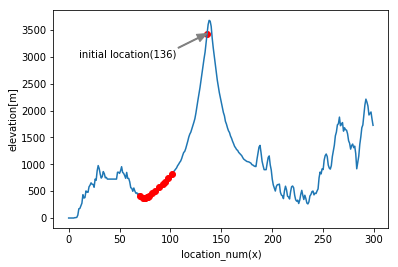

In [13]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する

# 富士山のデータを作成
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)

# 勾配計算の関数を作成
def gradient_calc(x):
    return fuji[x,3]-fuji[x-1,3] # xの変化量は常に1なので計算式における表現は省略

# 勾配計算の関数を使って、各地点での勾配をgradientリストに格納
gradient = []
gradient.append(0.0) # x=0では勾配算出できないので0.0を初めに入れておく
for x in fuji[1:, 0].astype(int):
    g = gradient_calc(x)
    gradient.append(g)
print("------勾配の配列(300要素)------\n", np.round(np.array(gradient),2))

# 勾配降下法の関数を作成
def gradient_descent(loc, gradient, a):
    loc = int(round(loc - a * gradient[loc]))
    return loc

# 最初にいる場所=136、ハイパーパラメータa = 0.2の場合
loc = 136
location = []
for _ in range(100): # 無限ループになっても上限100回で止める
    loc = gradient_descent(loc=loc, gradient=gradient, a=0.2)
    location.append(loc)
    if len(location) == 1:
        continue
    if location[-1] == location[-2]:
        break

print("------下山の推移のリスト------\n", location)

# 下山の推移の可視化
point = {
        'start': [10, 3000],
        'end': [136, fuji[136,3]]
    }

plt.plot(*point['end'], 'o', color="red")
plt.annotate('initial location(136)', xy=point['end'], xytext=point['start'],
             arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, 
                             connectionstyle='arc3', facecolor='gray', 
                             edgecolor='gray'))
plt.plot(fuji[:,0],fuji[:,3])
for x in location:
    plt.plot(x, fuji[x,3], marker="o", color="red") # 下山の推移を一つずつ取り出してプロット
plt.xlabel("location_num(x)")
plt.ylabel("elevation[m]")
plt.show()

## 4. 初期値の変更
ここまでの問題では最初の$x$を136としたが、$x$を139より大きい値にすると、富士山の反対側の斜面を下りていくことになる。
そういった初期値を設定した上で、移動毎の標高はリストに記録し、その過程を可視化する。

------勾配の配列(300要素)------
 [   0.      0.      0.      0.      0.      0.      6.62    0.59    4.99
   42.21  117.15    6.28   50.37   47.17  158.38  -62.02    8.32  123.34
  -18.01   -7.57  102.68   30.42   44.04  -26.74   -1.58  -54.09  151.4
  -22.01  177.53   96.7   -57.01 -102.16  -73.94   27.86   93.14  -37.54
  -78.13    7.72  -31.61    0.      0.      0.      0.      0.      0.
    0.      0.      0.    127.68   -0.82  -20.36   49.44   74.7  -105.62
  -17.92  -41.59  -51.04  109.86 -110.53   -1.82  -64.24 -108.22  -11.79
  -54.82   60.87  -55.26  -40.69    7.33  -40.17   24.72  -41.94  -49.98
   -6.61   13.23    2.13    0.15    6.43    9.02    3.5    28.27    2.19
   22.4    15.66   13.16   16.58   16.7    14.44   17.     17.1    21.43
   13.92   13.37   10.68   18.67   28.72   11.93   27.79   25.57   15.45
   12.51   18.9    22.67   22.37   41.     25.27   26.61   22.24   40.58
   26.92   34.1    25.35   46.11   60.78   53.28   20.11   52.55   67.58
   69.65   76.91   55.28   3

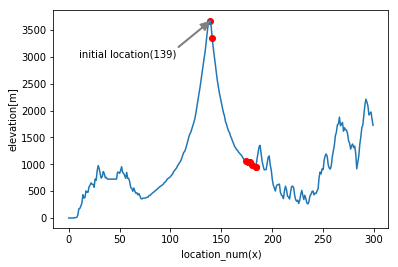

In [14]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する

# 富士山のデータを作成
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)

# 勾配計算の関数を作成
def gradient_calc(x):
    return fuji[x,3]-fuji[x-1,3] # xの変化量は常に1なので計算式における表現は省略

# 勾配計算の関数を使って、各地点での勾配をgradientリストに格納
gradient = []
gradient.append(0.0) # x=0では勾配算出できないので0.0を初めに入れておく
for x in fuji[1:, 0].astype(int):
    g = gradient_calc(x)
    gradient.append(g)
print("------勾配の配列(300要素)------\n", np.round(np.array(gradient),2))

# 勾配降下法の関数を作成
def gradient_descent(loc, gradient, a):
    loc = int(round(loc - a * gradient[loc]))
    return loc

# 最初にいる場所=139、ハイパーパラメータa = 0.15の場合
loc = 139
location = []
for _ in range(100): # 無限ループになっても上限100回で止める
    loc = gradient_descent(loc=loc, gradient=gradient, a=0.15)
    location.append(loc)
    if len(location) == 1:
        continue
    if location[-1] == location[-2]:
        break

print("------下山の推移のリスト------\n", location)

# 下山の推移の可視化
point = {
        'start': [10, 3000],
        'end': [139, fuji[139,3]]
    }

plt.plot(*point['end'], 'o', color="red")
plt.annotate('initial location(139)', xy=point['end'], xytext=point['start'],
             arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, 
                             connectionstyle='arc3', facecolor='gray', 
                             edgecolor='gray'))
plt.plot(fuji[:,0],fuji[:,3])
for x in location:
    plt.plot(x, fuji[x,3], marker="o", color="red") # 下山の推移を一つずつ取り出してプロット
plt.xlabel("location_num(x)")
plt.ylabel("elevation[m]")
plt.show()

## 5. （アドバンス課題）並列計算
初期値によって結果が変化するので、0から299まで全ての初期値の計算を行ってみるということを考えられる。
for文を使い繰り返すこともできるが、NumPyの配列を工夫して使うことで複数の計算を同時に行うことができる。ここまで作成した関数を複数の初期値が同時に計算できるように改良する。

------下山開始場所：0から300まで(a=0.005)------


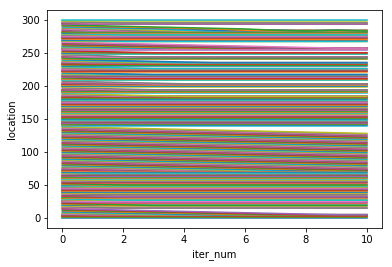

------下山開始場所：65から175まで(a=0.1)------


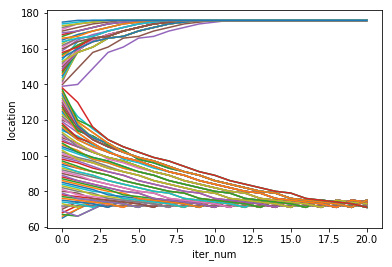

In [15]:
# 各点での勾配計算
def gradient_calc(x):
    return fuji[x,3]-fuji[x-1,3] # xの変化量は常に1なので計算式における表現は省略

gradient = []
gradient.append(0.0) # 便宜上、点0の勾配に0.0を格納
for x in fuji[1:, 0].astype(int):
    g = gradient_calc(x)
    gradient.append(g)


# 0から299までの下山開始点の2次元配列
Loc = np.arange(0,300).reshape(-1,1)


# 並列計算
def gradient_func(x):
    return gradient[x]

def ultimate_gradient_descent(Loc, gradient, a, iter_num):
    Loc_history = Loc
    for _ in range(iter_num):
        Gradient = np.vectorize(gradient_func)(Loc) # 各点における勾配計算
        Loc = (Loc - a * Gradient).astype(int) # 勾配降下法による計算
        Loc_history = np.hstack((Loc_history, Loc)) # 計算結果をLocationのhistoryとして新たに追加
    for x in range(Loc_history.shape[0]):
        plt.plot(np.arange(iter_num+1), Loc_history[x,:]) # 各点における推移をプロット
        plt.xlabel("iter_num")
        plt.ylabel("location")
    plt.show()


# 勾配降下法の計算途中で下山場所がデータ範囲から逸脱エラーしてしまう場所があるので、学習率a=0.005という小さい値が限界
print("------下山開始場所：0から300まで(a=0.005)------")
ultimate_gradient_descent(Loc=Loc, gradient=gradient, a=0.005, iter_num=10)

# 学習率a=0.1にて、下山開始場所が65から175のどこかであれば極小値（2箇所のどちらか）まで下山できる
print("------下山開始場所：65から175まで(a=0.1)------")
Loc2 = np.arange(65,176).reshape(-1,1)
ultimate_gradient_descent(Loc=Loc2, gradient=gradient, a=0.1, iter_num=20)
